
Model Evaluation Metrics:
Mean Absolute Error (MAE): 56722.43431633837
Mean Squared Error (MSE): 5909928044.702564
R^2 Score: 0.5490012551168504


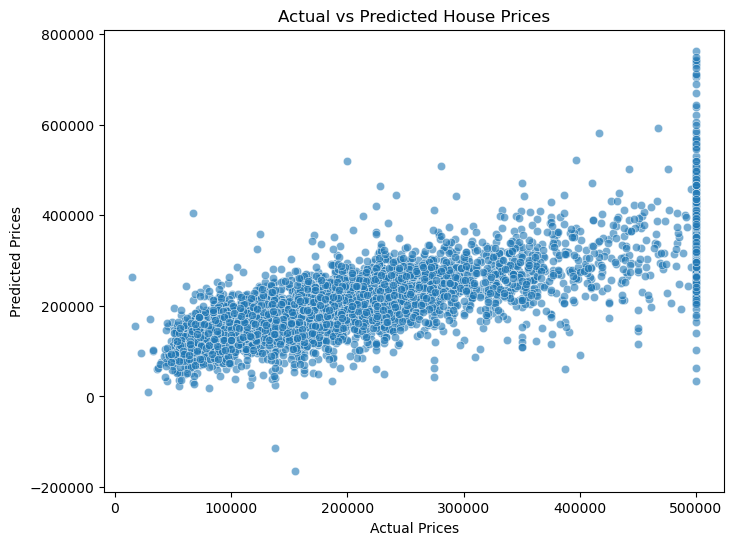

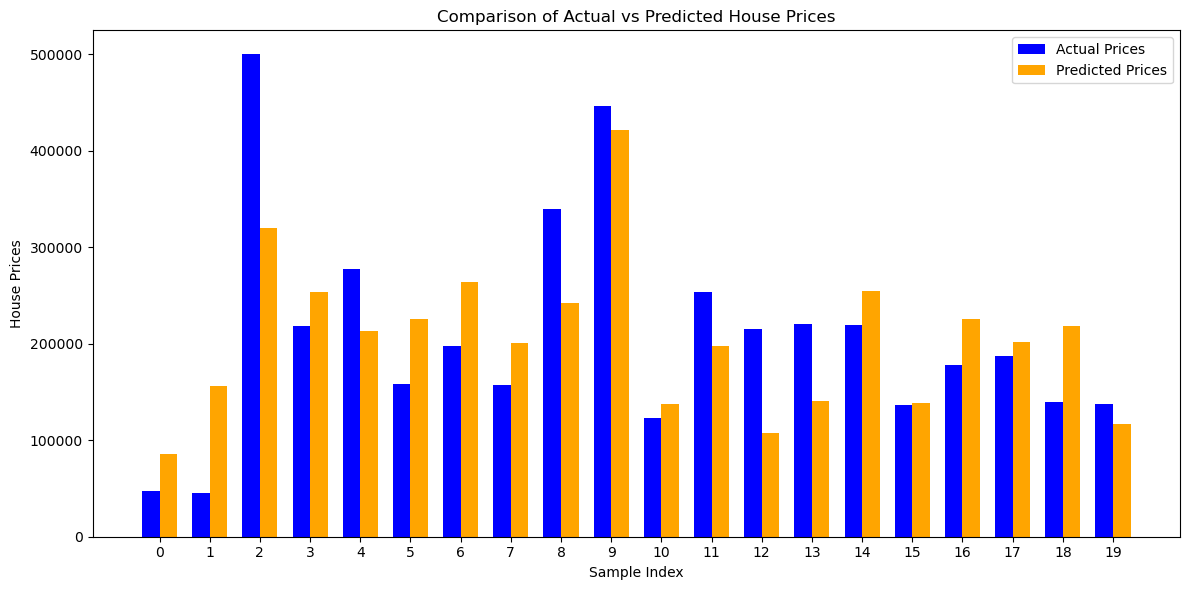

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
data = pd.read_csv(url)

selected_features = ['median_income', 'total_rooms', 'housing_median_age', 'population', 'households']
target = 'median_house_value'

data = data[selected_features + [target]].dropna()

X = data[selected_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

n = 20
actual_values = y_test[:n].values
predicted_values = y_pred[:n]

indices = np.arange(n)
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(indices - width/2, actual_values, width, label='Actual Prices', color='blue')
plt.bar(indices + width/2, predicted_values, width, label='Predicted Prices', color='orange')

plt.xlabel("Sample Index")
plt.ylabel("House Prices")
plt.title("Comparison of Actual vs Predicted House Prices")
plt.xticks(indices)
plt.legend()
plt.tight_layout()
plt.show()
